# K-Means

- Unsupervised learning
- Klasifikasi tanpa mengetahui jumlah class dari data target
- Nilai k diketahui menggunakan __elbow method__ dari plot k vs sum squared error

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<hr>

### 1. Prepare dataset & plot it

In [84]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=['SL', 'SW', 'PL', 'PW'])
df['target'] = iris['target']
df.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


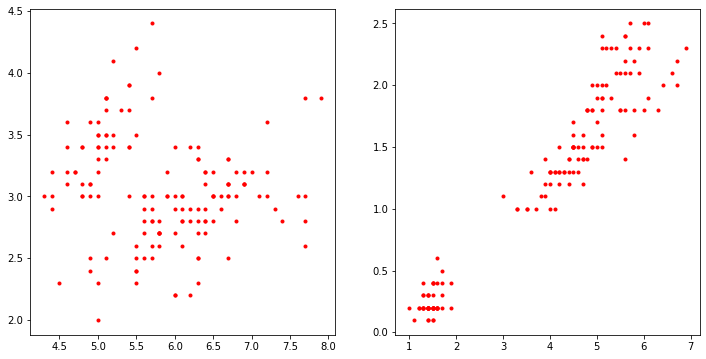

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(df['SL'], df['SW'], 'r.')
plt.subplot(122)
plt.plot(df['PL'], df['PW'], 'r.')

<hr>

### 2. KMeans Clustering

In [93]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, max_iter=10000) 

# tingkatkan max_iter untuk mendapatka hasil label prediction consistent
# nilai n_clusters / k sementara ini didapat dari jumlah class dataset!

model.fit(df[['SL', 'SW', 'PL', 'PW']])

# training & predict at once
# model.fit_predict(df[['SL', 'SW', 'PL', 'PW']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
# prediksi data
model.predict(df[['SL', 'SW', 'PL', 'PW']])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [90]:
df['prediksi'] = model.predict(df[['SL', 'SW', 'PL', 'PW']])
df.head()

,SL,SW,PL,PW,target,prediksi
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [91]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

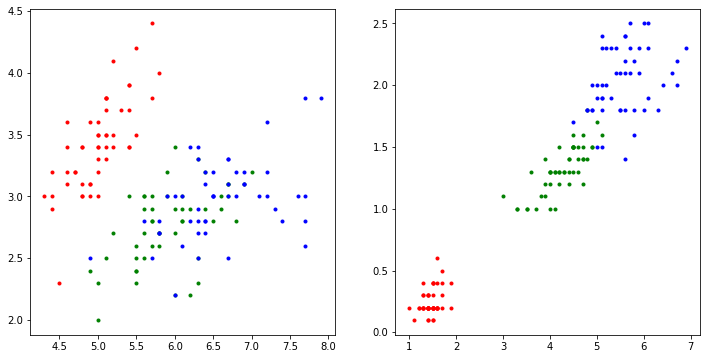

In [92]:
# Plot data & actual target
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(df['SL'][df['target'] == 0], df['SW'][df['target'] == 0], 'r.')
plt.plot(df['SL'][df['target'] == 1], df['SW'][df['target'] == 1], 'g.')
plt.plot(df['SL'][df['target'] == 2], df['SW'][df['target'] == 2], 'b.')

plt.subplot(122)
plt.plot(df['PL'][df['target'] == 0], df['PW'][df['target'] == 0], 'r.')
plt.plot(df['PL'][df['target'] == 1], df['PW'][df['target'] == 1], 'g.')
plt.plot(df['PL'][df['target'] == 2], df['PW'][df['target'] == 2], 'b.')

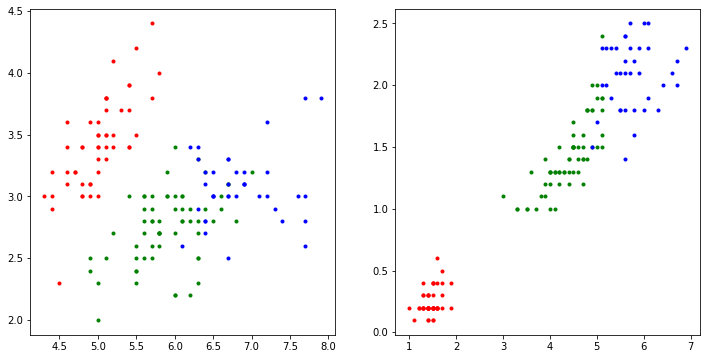

In [77]:
# Plot data & prediction target
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(df['SL'][df['prediksi'] == 0], df['SW'][df['prediksi'] == 0], 'r.')
plt.plot(df['SL'][df['prediksi'] == 1], df['SW'][df['prediksi'] == 1], 'g.')
plt.plot(df['SL'][df['prediksi'] == 2], df['SW'][df['prediksi'] == 2], 'b.')

plt.subplot(122)
plt.plot(df['PL'][df['prediksi'] == 0], df['PW'][df['prediksi'] == 0], 'r.')
plt.plot(df['PL'][df['prediksi'] == 1], df['PW'][df['prediksi'] == 1], 'g.')
plt.plot(df['PL'][df['prediksi'] == 2], df['PW'][df['prediksi'] == 2], 'b.')

<hr>

### 3. Centroids

In [78]:
# centroids
print(model.cluster_centers_)

#           SL          SW         PL          PW
# class0 [[5.006      3.428      1.462      0.246     ]
# class1  [6.85       3.07368421 5.74210526 2.07105263]
# class2  [5.9016129  2.7483871  4.39354839 1.43387097]]

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


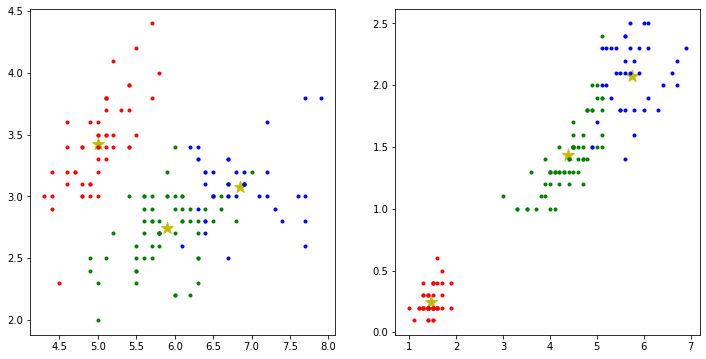

In [79]:
# Plot data & prediction target with its centroids
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(
    model.cluster_centers_[:,0],
    model.cluster_centers_[:,1],
    color = 'y',
    marker = '*',
    s = 150
)
plt.plot(df['SL'][df['prediksi'] == 0], df['SW'][df['prediksi'] == 0], 'r.')
plt.plot(df['SL'][df['prediksi'] == 1], df['SW'][df['prediksi'] == 1], 'g.')
plt.plot(df['SL'][df['prediksi'] == 2], df['SW'][df['prediksi'] == 2], 'b.')

plt.subplot(122)
plt.scatter(
    model.cluster_centers_[:,2],
    model.cluster_centers_[:,3],
    color = 'y',
    marker = '*',
    s = 150
)
plt.plot(df['PL'][df['prediksi'] == 0], df['PW'][df['prediksi'] == 0], 'r.')
plt.plot(df['PL'][df['prediksi'] == 1], df['PW'][df['prediksi'] == 1], 'g.')
plt.plot(df['PL'][df['prediksi'] == 2], df['PW'][df['prediksi'] == 2], 'b.')

<hr>

### 4. Calculate k with Elbow Method

In [80]:
# sum squared error
k_range = range(1,10)
sse = []
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df[['SL', 'SW', 'PL', 'PW']])
    sse.append(model.inertia_)

sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.299664502164504,
 27.895494645705178]

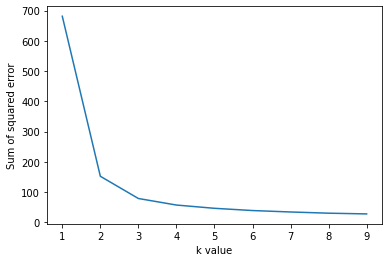

In [81]:
# plot sse vs k
plt.plot(k_range, sse)
plt.xlabel('k value')
plt.ylabel('Sum of squared error')
plt.show()

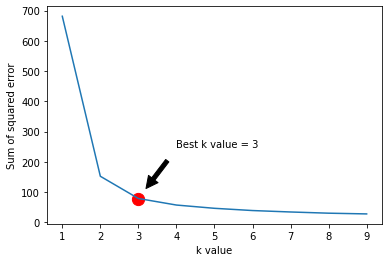

In [82]:
# nilai k terbaik ada di bagian 'siku grafik'
plt.plot(k_range, sse)
plt.scatter(k_range[2], sse[2], marker='o', color='r', s=150)
plt.annotate('Best k value = 3', xy=(k_range[2], sse[2]), xytext=(4, 250),
             arrowprops=dict(facecolor='black', shrink=0.2))

plt.xlabel('k value')
plt.ylabel('Sum of squared error')
plt.show()